In [5]:
import numpy as np
import matplotlib.pyplot as plt


In [6]:
class ContinuousSignal:

    def __init__(self, func,start=None):
        """Initializes the signal with a given funnc"""
        self.func = func
        self.start = start

    def shift(self, shift):
        """Returns a new ContinuousSignal instance with the shifted signal x(n - shift)."""

        def shifted_func(t):
            return self.func(t - shift)

        return ContinuousSignal(shifted_func)

    # we can also write it with lamda function
    # return ContinuousSignal(lamda t: self.func(t-shift))

    def add(self, other):
        """Returns a new ContinuousSignal instance representing the sum of two signals."""
        return ContinuousSignal(lambda t: self.func(t) + other.func(t))

    def multiply(self, other):
        """Returns a new ContinuousSignal instance representing element-wise multiplication."""
        return ContinuousSignal(lambda t: self.func(t) * other.func(t))

    def multiply_const_factor(self, scaler):
        """Returns a new ContinuousSignal instance with the signal multiplied by a constant factor."""
        return ContinuousSignal(lambda t: self.func(t) * scaler)

    def plot(self, figsize=(8, 3), t_range=(-3,3),y_range=(-.1,1.3), title="Continuous Signal", x_label='t (Time)',
             y_label='x(t)', saveTo=None):
        """Plots the signal using matplotlib."""

        # create a new figure
        plt.figure(figsize=figsize)

        # set x-axis times
        t = np.linspace(t_range[0], t_range[1], 1000)
        plt.xticks(np.arange(t_range[0], t_range[1], 1))

        # set y-axis values
        y = self.func(t)
        plt.ylim(y_range)

        # plot the signal (X,Y)
        plt.plot(t, y)

        # set title
        plt.title(title)
        # set x_label
        plt.xlabel(x_label)
        # set y_label
        plt.ylabel(y_label)

        # add grid to the plot
        plt.grid(True)

        # save plotted graph to the path
        if saveTo is not None:
            plt.savefig(saveTo)

        plt.show()

    def __str__(self):
        return f"This is a continuous signal defined by the function {self.func}"


In [7]:
def sine_wave(t):
    return np.sin(t)
def line(t):
    return t + 2
def zero(t):
    return 0*t


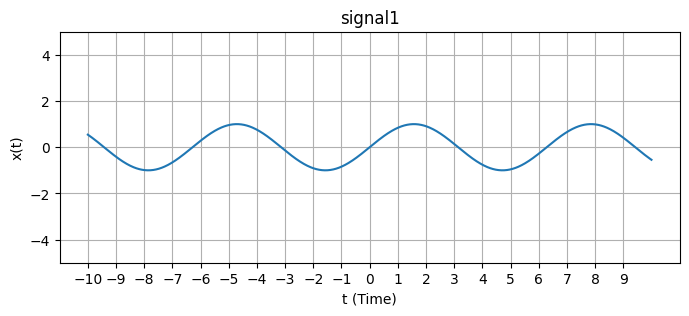

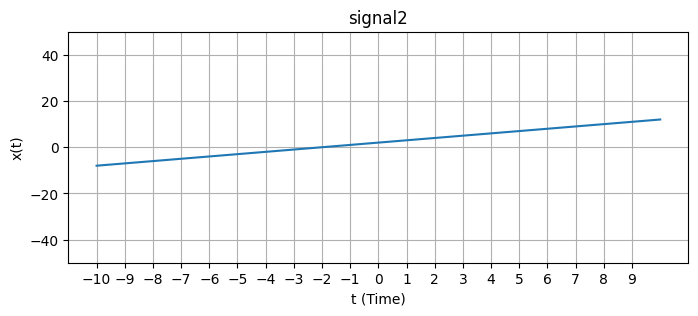

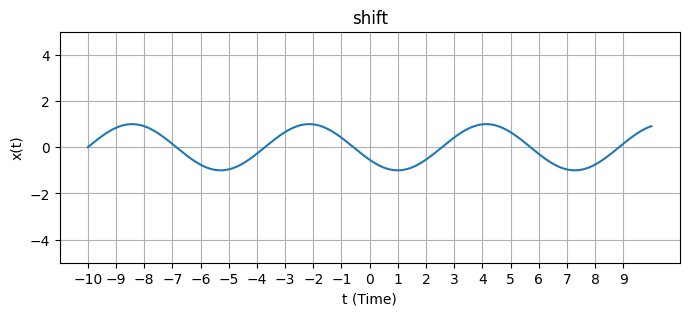

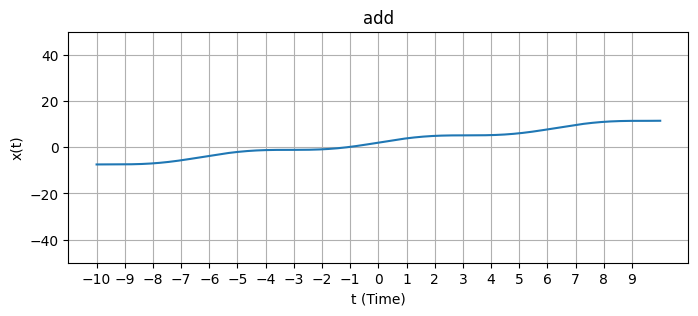

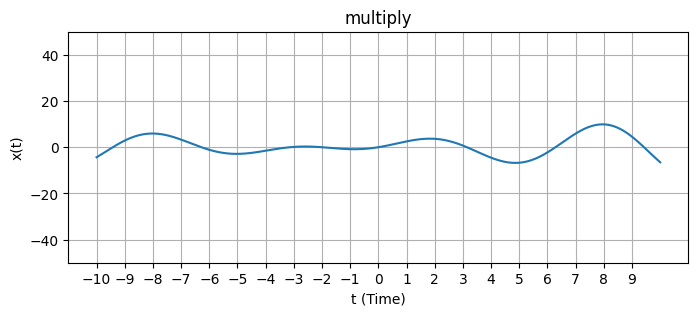

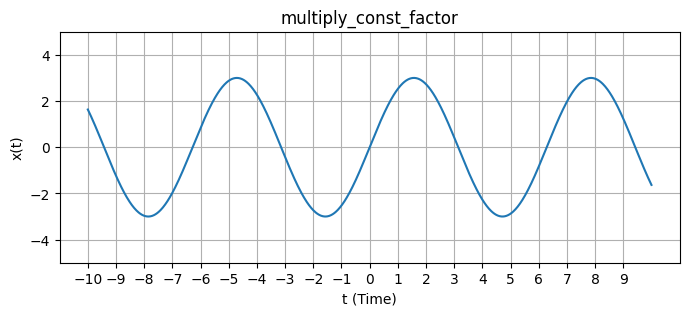

In [9]:
signal1 = ContinuousSignal(sine_wave)
signal2 = ContinuousSignal(line)

signal1.plot(title="signal1",t_range=(-10,10),y_range=(-5,5))
signal2.plot(title="signal2",t_range=(-10,10),y_range=(-50,50))
signal1.shift(-10).plot(title="shift",t_range=(-10,10),y_range=(-5,5))
signal1.add(signal2).plot(title="add",t_range=(-10,10),y_range=(-50,50))
signal1.multiply(signal2).plot(title="multiply",t_range=(-10,10),y_range=(-50,50))
signal1.multiply_const_factor(3).plot(title="multiply_const_factor",t_range=(-10,10),y_range=(-5,5))
